In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

In [3]:
newsgroups_data = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))

In [4]:
def load_images(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number and metadata
        magic_number = int.from_bytes(f.read(4), byteorder='big')  # Magic number
        num_images = int.from_bytes(f.read(4), byteorder='big')    # Number of images
        num_rows = int.from_bytes(f.read(4), byteorder='big')      # Rows per image
        num_cols = int.from_bytes(f.read(4), byteorder='big')      # Columns per image

        # Read the image data
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num_images, num_rows, num_cols)    # Reshape into 3D array
    return images

def load_labels(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number and metadata
        magic_number = int.from_bytes(f.read(4), byteorder='big')  # Magic number
        num_labels = int.from_bytes(f.read(4), byteorder='big')    # Number of labels

        # Read the label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels


train_images_file = 'Mnist/train-images.idx3-ubyte'
train_labels_file = 'Mnist/train-labels.idx1-ubyte'
test_images_file = 'Mnist/t10k-images.idx3-ubyte'
test_labels_file = 'Mnist/t10k-labels.idx1-ubyte'

mnist_train_images = load_images(train_images_file)
mnist_train_labels = load_labels(train_labels_file)
mnist_test_images = load_images(test_images_file)
mnist_test_labels = load_labels(test_labels_file)

mnist_feature_names = [f'pixel_{i}' for i in range(784)]
print(f"Number of images: {mnist_train_images.shape[0]}")
print(f"Image shape: {mnist_test_images.shape[0:]}")  # Rows x Columns
print(f"Image shape: {mnist_train_images.shape[1:]}")  # Rows x Columns
print(f"First label: {mnist_train_labels[0]}")

Number of images: 60000
Image shape: (10000, 28, 28)
Image shape: (28, 28)
First label: 5


In [5]:
import re
columns = []
with open('spambase/spambase.names','r') as file:
    for line in file:
        if line[0]=='|' or line[0]=='1' or line[0]=='\n':
            continue
        column_name,_ = line.split(':')
        columns.append(column_name)
columns.append('label')

In [6]:
spambase_df = pd.read_csv('spambase/spambase.data',names=columns)
spambase_features=columns

# Problem 1

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_features=10000,token_pattern='[A-Za-z]+',use_idf=False)  # Remove stopwords and apply TF-IDF
ng_group_tf_vector = vectorizer.fit_transform(newsgroups_data.data)

In [7]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray'
          , '#FF5733', '#33FF57', '#3357FF',
          '#FF33A8', '#A833FF', '#FF8C00', '#FFD700', '#8B4513', '#DC143C',
          '#2E8B57', '#4682B4', '#708090']

shapes = ["o", "s", "D", "d", "^", "v", ">", "<", "p", "h", 
           "H", "*", "+", "x", "X", "|", "_", ",", ".",None ]

In [22]:
def plot_ng_20_in_3d(ng_20_transformed,ng_20_labels,ng_20_label_names):
    
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(20):
        mask = ng_20_labels == i
        ax.scatter(ng_20_transformed[mask, 0], ng_20_transformed[mask, 1], ng_20_transformed[mask, 2], 
                   c=[colors[c] for c in ng_20_labels[mask]], 
                   marker=shapes[i], label=f'{ng_20_label_names[i]}', alpha=0.6)

    ax.set_xlabel('Dim1')
    ax.set_ylabel('Dim2')
    ax.set_zlabel('Dim3')
    ax.set_title('3D representation of 20 NG')
    ax.legend()
    plt.show()

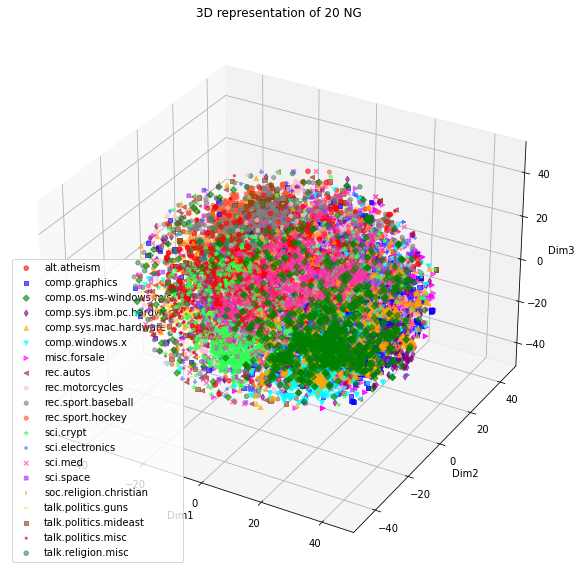

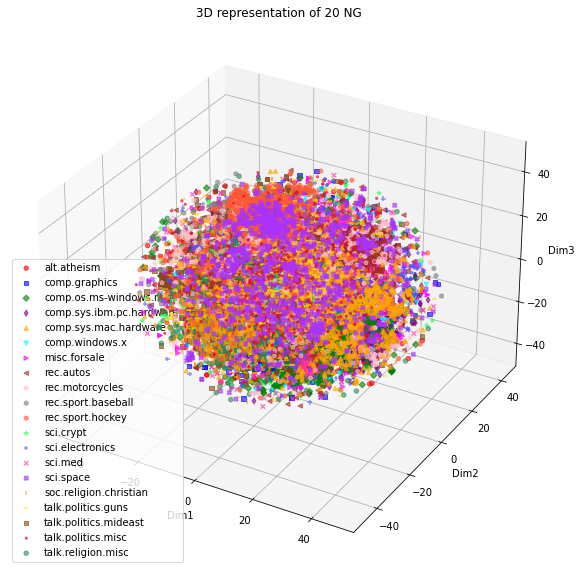

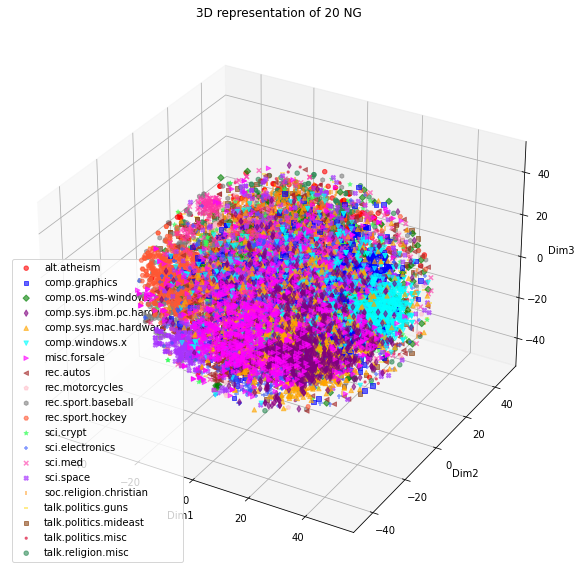

In [10]:
ng_20_labels = newsgroups_data.target
ng_20_label_names = newsgroups_data.target_names
perplexities = [50,70,100]
for perplexity in perplexities:
    tsne_ng_20 = TSNE(n_components=3,perplexity=perplexity,metric='cosine')
    ng_20_transformed = tsne_ng_20.fit_transform(ng_group_tf_vector)
    plot_ng_20_in_3d(ng_20_transformed,ng_20_labels,ng_20_label_names)

In [6]:
X_train_mnist = mnist_train_images.reshape(60000,784)

In [11]:
# For mnist dataset
def zero_mean_unit_variance_normalization(data):

    mnist_data_normalized_with_unit_var = []
    for image in data:
        image = np.reshape(image,(784,))
        pixel_value_mean = image.mean()
        pixel_value_std = image.std()
        # Shifting scale to [0,1]
        image = (image-pixel_value_mean)/(pixel_value_std)
        mnist_data_normalized_with_unit_var.append(image)
    return mnist_data_normalized_with_unit_var

mnist_train_images_normalized_with_unit_var = zero_mean_unit_variance_normalization(mnist_train_images)
mnist_test_images_normalized_with_unit_var = zero_mean_unit_variance_normalization(mnist_test_images)

In [14]:
mnist_tsne = TSNE(n_components=3,perplexity=30)
X = np.array(mnist_train_images_normalized_with_unit_var)
mnist_transformed = mnist_tsne.fit_transform(X)

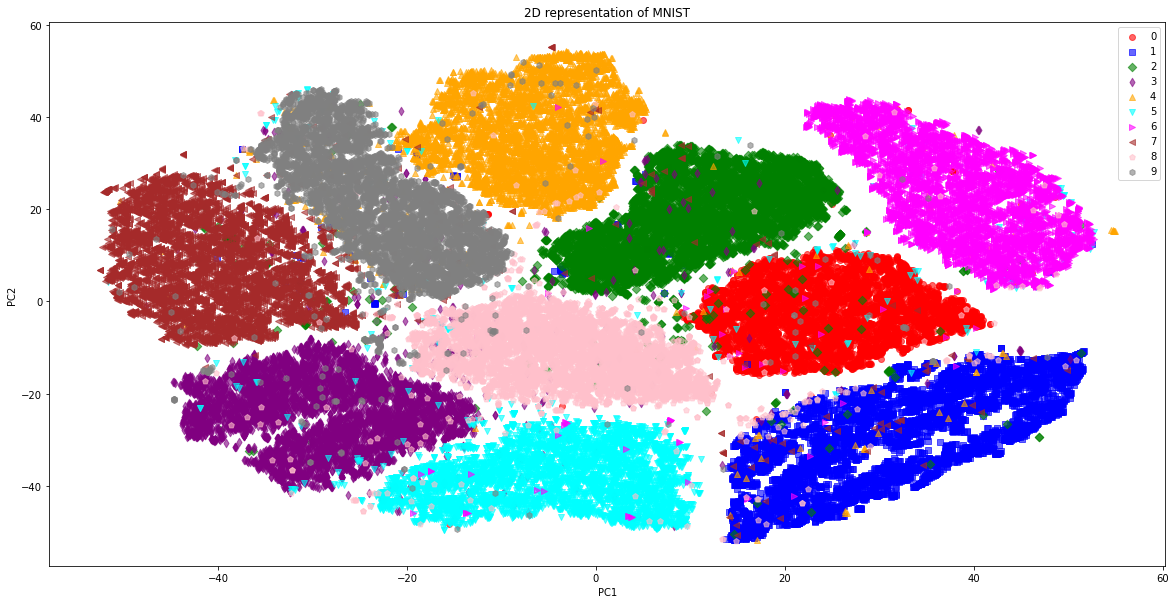

In [100]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)

for i in range(10):
    mask = mnist_train_labels == i
    ax.scatter(mnist_transformed[mask, 0], mnist_transformed[mask, 1], 
               c=colors[i],  # Directly use the color for class i
               marker=shapes[i], label=f'{i}', alpha=0.6)
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('2D representation of MNIST')
ax.legend()
plt.show()

# Problem 1 Part B

In [85]:
from sklearn.cluster import DBSCAN
mnist_dbscan = DBSCAN(eps=1.6,min_samples=30)
mnist_dbscan.fit(mnist_transformed)

DBSCAN(eps=1.6, min_samples=30)

In [86]:
mnist_labels = mnist_dbscan.labels_

In [87]:
classes = np.unique(mnist_labels)

In [88]:
classes

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

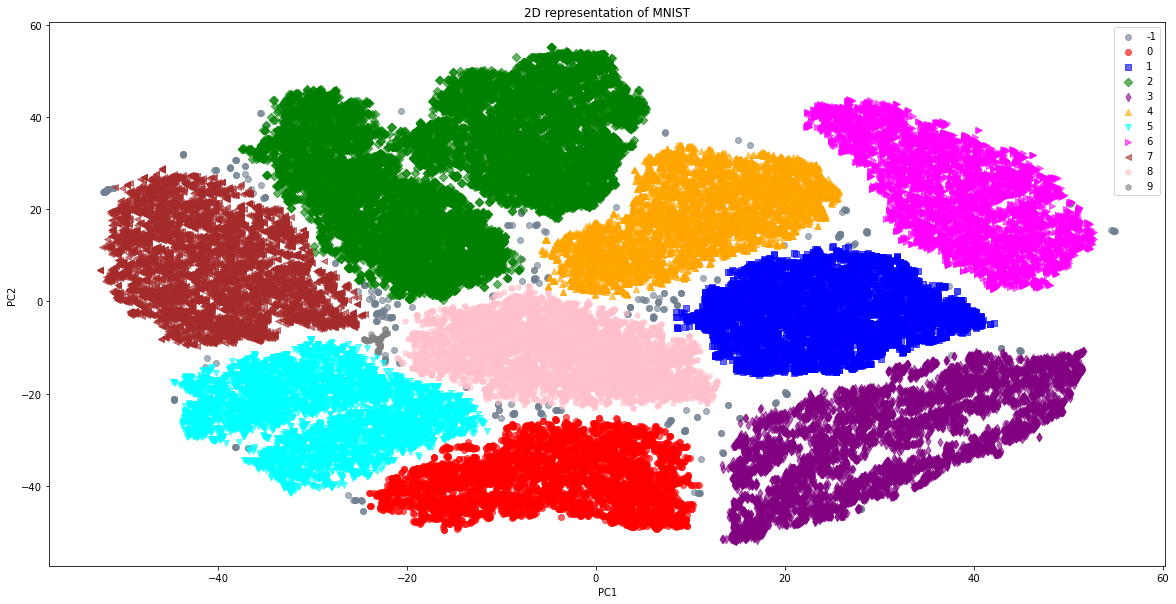

In [102]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)

for i in range(-1,len(classes)-1):
    mask = mnist_labels == i
    ax.scatter(mnist_transformed[mask, 0], mnist_transformed[mask, 1], 
               c=colors[i],  # Directly use the color for class i
               marker=shapes[i], label=f'{i}', alpha=0.6)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('2D representation of MNIST')
ax.legend()
plt.show()

<AxesSubplot:>

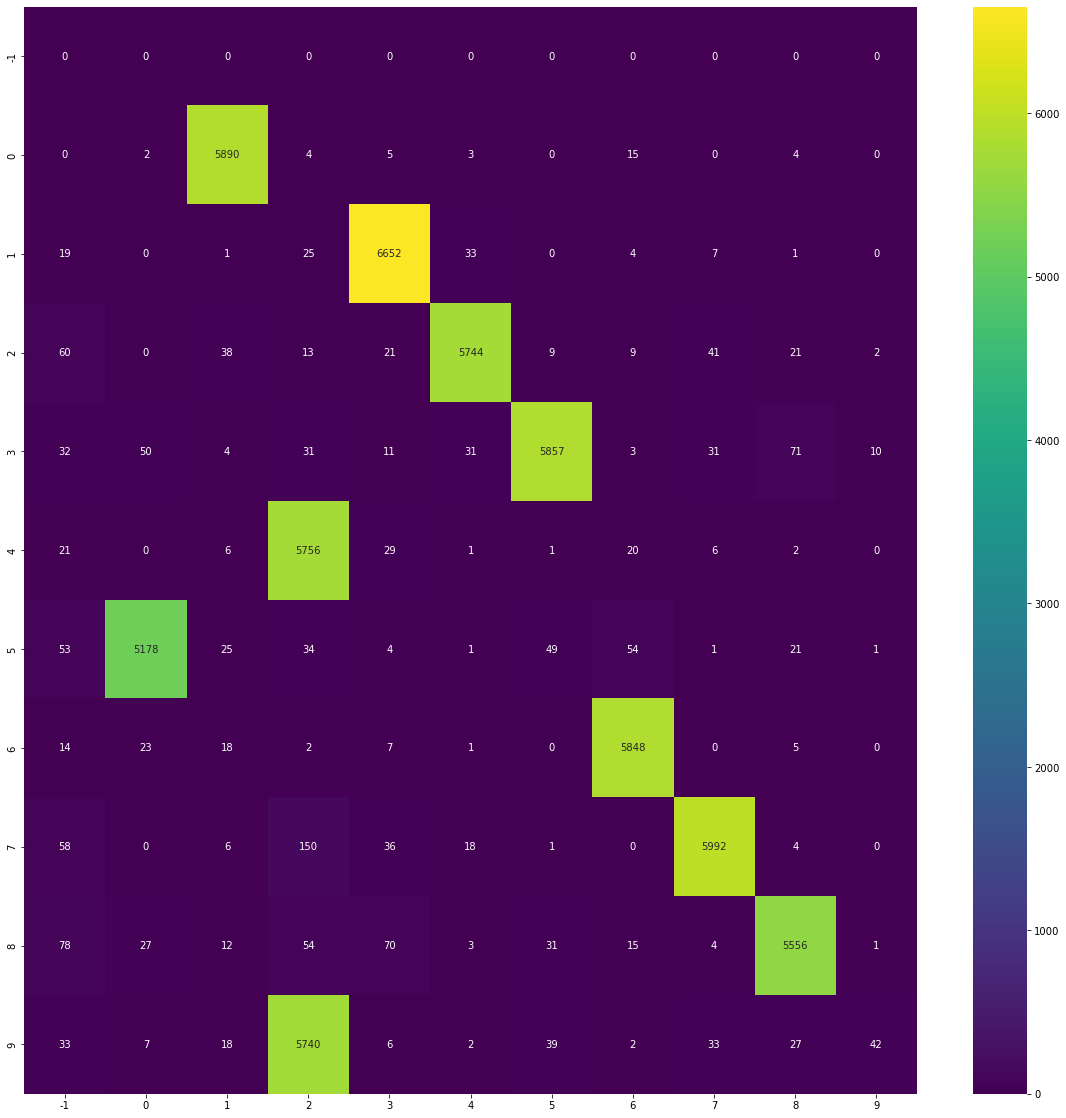

In [98]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20, 20))
cf_matrix = confusion_matrix(mnist_train_labels,mnist_labels)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=classes, yticklabels=classes)

# Problem 2

In [15]:
import numpy as np
import time
from sklearn.metrics import pairwise_distances

class TSNE:
    def __init__(self, n_components=2, perplexity=30, batch_size=1000, learning_rate=20, max_iter=400):
        self.n_components = n_components
        self.perplexity = perplexity
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_iter = max_iter
        self.dist_matrix = None

    def fit_transform(self, X,labels):
        N = X.shape[0]
        P = np.zeros((N, N))

        # Compute the full pairwise distance matrix
        self.dist_matrix = pairwise_distances(X, X, metric='euclidean')
        start = time.time()
        for i in range(N):
            beta = 0.6  # Initial beta
            D_i = self.dist_matrix[i, :]
            P_i = np.zeros(N)

            betamin = -float('inf')
            betamax = float('inf')

            trials = 0
            H_diff = 1  # Initialize high entropy difference

            # Binary search for beta
            while abs(H_diff) > 1e-5 and trials < 50:
                P_i = np.exp(-D_i * beta)  # Compute P_i
                P_i[i] = 0  # Set diagonal to zero
                P_i = P_i / np.sum(P_i)  # Normalize
                
                H = -np.sum(P_i * np.log2(P_i + 1e-10))  # Compute entropy (adding small constant to avoid log(0))
                H_diff = H - np.log2(self.perplexity)  # Compare with target entropy

                # Adjust beta using binary search
                if H_diff > 0:  # Entropy too high -> increase beta
                    betamin = beta
                    beta = beta * 1.1 if betamax == float('inf') else (beta + betamax) / 2
                else:  # Entropy too low -> decrease beta
                    betamax = beta
                    beta = beta * 0.9 if betamin == -float('inf') else (beta + betamin) / 2
                
                trials += 1

            P[i, :] = P_i  # Store computed P_i
        end = time.time()
        
        time_taken = end-start
        
        print(f'Time taken to calculate all simmilarites {time_taken} sec')

        # Symmetrize P
        P = (P + P.T) / (2 * np.sum(P))
        const_KL = -np.sum(P * np.log(P + 1e-10))  # Compute KL divergence

        # Initialize embedding Y
        y = 0.0001 * np.random.randn(N, self.n_components)
        y_incs = np.zeros((N, self.n_components))
        gains = np.ones((N, self.n_components))

        epsilon = 500
        min_gain = 0.01
        use_momentum = True  # Define use_momentum
        
        plt.figure(figsize=(8, 6))
        # Run t-SNE optimization
        start = time.time()
        for i in range(self.max_iter):
            
            sum_y2 = np.sum(y**2, axis=1, keepdims=True)
            Qnum = 1 / (1 + sum_y2 + sum_y2.T - 2 * np.dot(y, y.T))
            np.fill_diagonal(Qnum, 0)  # Set diagonal to zero
            Q = Qnum / np.sum(Qnum)  # Normalize

            L = (P - Q) * Qnum
            y_grads = 4 * (np.diag(np.sum(L, axis=1)) - L) @ y

            if use_momentum:
                gains = (gains + 0.2) * (np.sign(y_grads) != np.sign(y_incs)) + (gains * 0.8) * (np.sign(y_grads) == np.sign(y_incs))
                gains[gains < min_gain] = min_gain
                y_incs = -epsilon * (gains * y_grads)
            else:
                y_incs = -epsilon * y_grads

            y += y_incs
            y -= np.mean(y, axis=0)  # Center y
            
            if i % 10 == 0:
                end=time.time()
                time_taken = end-start
                cost = np.sum(P * np.log((P + 1e-10) / (Q + 1e-10)))  # Compute KL divergence
                print(f"\nIteration {i}: error is {cost:.5f}")
                print(f'Time taken:{time_taken} sec\n')
                plt.clf()
                if labels is not None:
                    plt.scatter(y[:, 0], y[:, 1], c=labels, cmap="jet", edgecolor='k', alpha=0.7)
                else:
                    plt.scatter(y[:, 0], y[:, 1], c="blue", edgecolor='k', alpha=0.7)
                plt.title(f"t-SNE Iteration {i}")
                plt.xlabel("Dimension 1")
                plt.ylabel("Dimension 2")
                plt.grid(True)
                plt.pause(0.1)
                start=time.time()

        plt.show()
        return y  # Return final embedding

In [16]:
mnist_sampled = np.array(mnist_train_images_normalized_with_unit_var)[:10000,:]
mnist_sampled_labels = mnist_train_labels[:10000]

In [17]:
from sklearn.decomposition import PCA
mnist_pca  = PCA(n_components=50)
mnist_50d = mnist_pca.fit_transform(mnist_sampled)

Time taken to calculate all simmilarites 27.990932941436768 sec

Iteration 0: error is 5.65739
Time taken:2.3192267417907715 sec



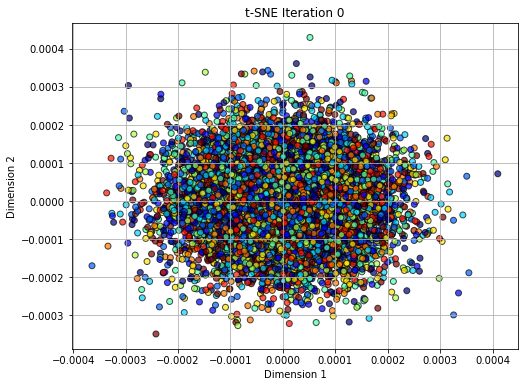


Iteration 10: error is 5.65739
Time taken:21.812259674072266 sec



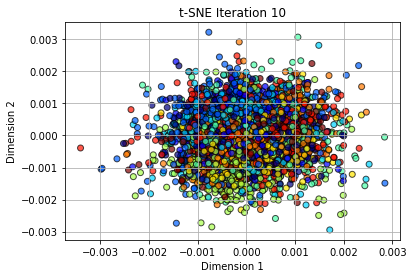


Iteration 20: error is 5.64704
Time taken:25.07831573486328 sec



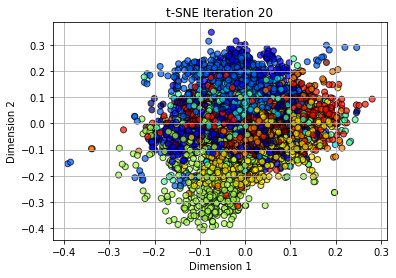


Iteration 30: error is 4.27594
Time taken:21.661038875579834 sec



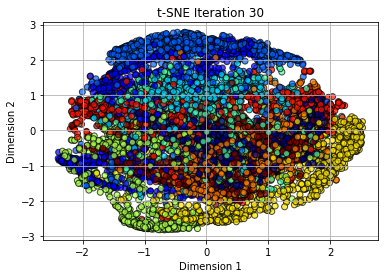


Iteration 40: error is 3.60241
Time taken:26.7129647731781 sec



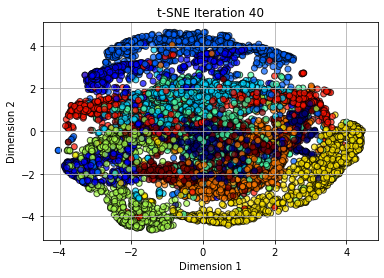


Iteration 50: error is 3.23860
Time taken:28.21184778213501 sec



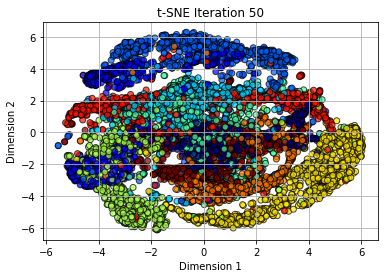


Iteration 60: error is 3.01513
Time taken:24.64982032775879 sec



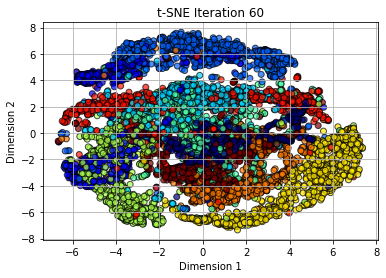


Iteration 70: error is 2.86159
Time taken:22.29360580444336 sec



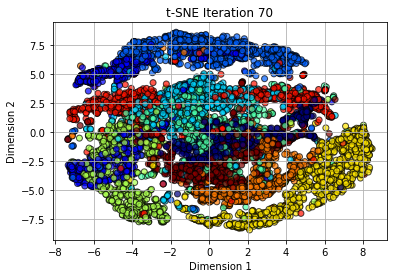


Iteration 80: error is 2.74352
Time taken:23.216418743133545 sec



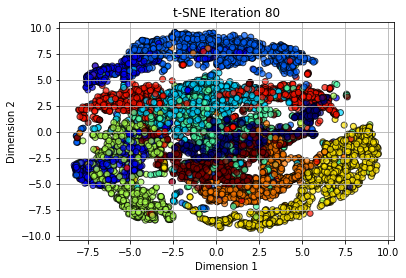


Iteration 90: error is 2.64914
Time taken:22.043224096298218 sec



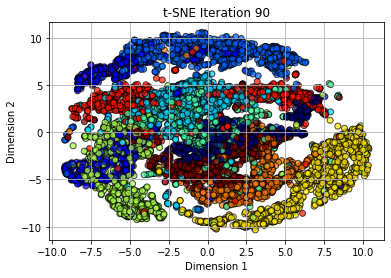


Iteration 100: error is 2.57196
Time taken:22.033953189849854 sec



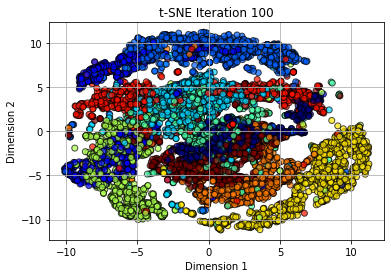


Iteration 110: error is 2.50687
Time taken:22.027257204055786 sec



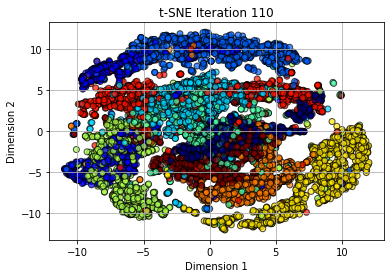


Iteration 120: error is 2.45064
Time taken:22.03750729560852 sec



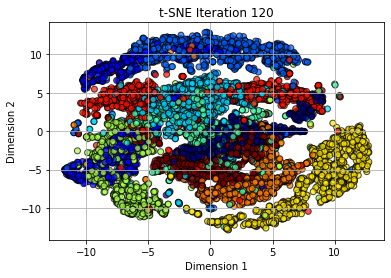


Iteration 130: error is 2.40136
Time taken:22.04381489753723 sec



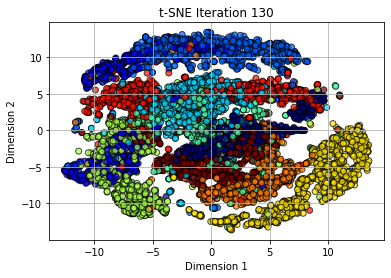


Iteration 140: error is 2.35767
Time taken:24.677457571029663 sec



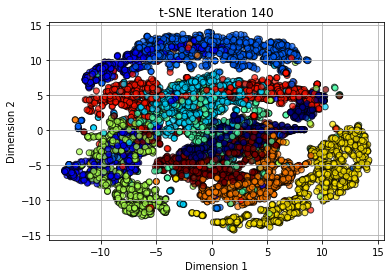


Iteration 150: error is 2.31844
Time taken:22.20801329612732 sec



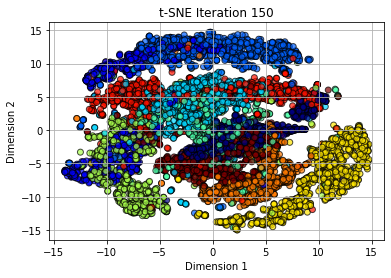


Iteration 160: error is 2.28289
Time taken:22.044055938720703 sec



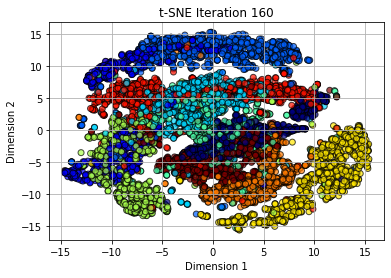


Iteration 170: error is 2.25055
Time taken:23.217440128326416 sec



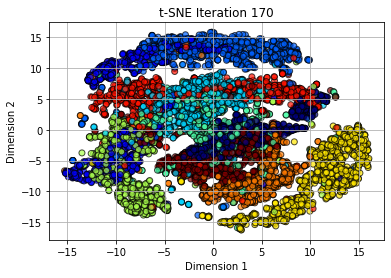


Iteration 180: error is 2.22094
Time taken:21.967461347579956 sec



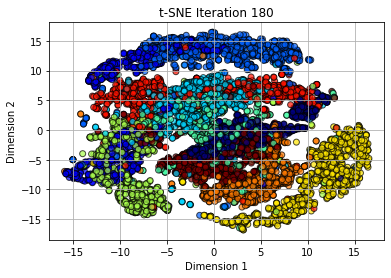


Iteration 190: error is 2.19367
Time taken:21.95958375930786 sec



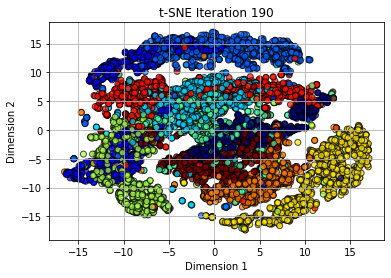


Iteration 200: error is 2.16846
Time taken:21.9600830078125 sec



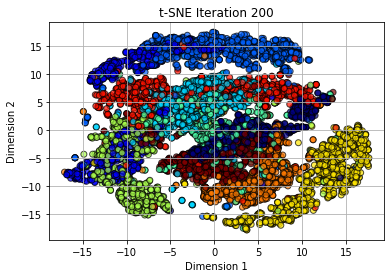


Iteration 210: error is 2.14514
Time taken:21.953707933425903 sec



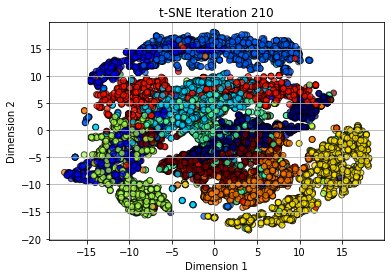


Iteration 220: error is 2.12332
Time taken:21.96237301826477 sec



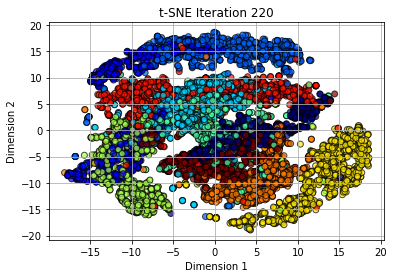


Iteration 230: error is 2.10291
Time taken:21.956202507019043 sec



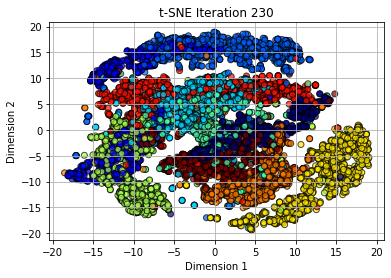


Iteration 240: error is 2.08379
Time taken:21.950599431991577 sec



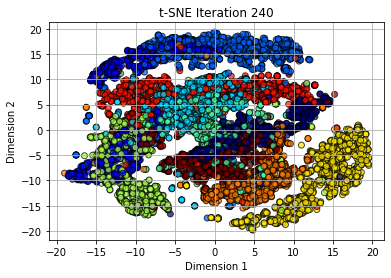


Iteration 250: error is 2.06578
Time taken:21.952966451644897 sec



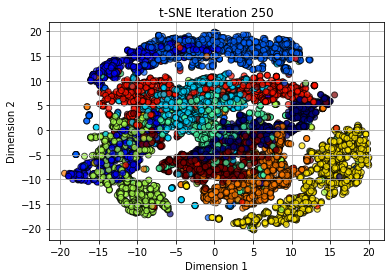


Iteration 260: error is 2.04867
Time taken:21.972041368484497 sec



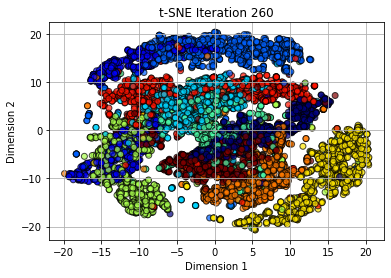


Iteration 270: error is 2.03248
Time taken:21.95551872253418 sec



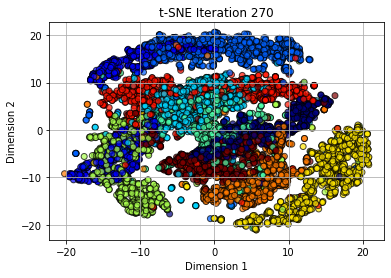


Iteration 280: error is 2.01724
Time taken:21.953744649887085 sec



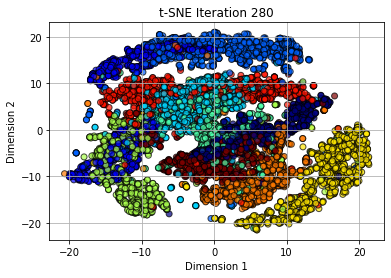


Iteration 290: error is 2.00272
Time taken:21.9713237285614 sec



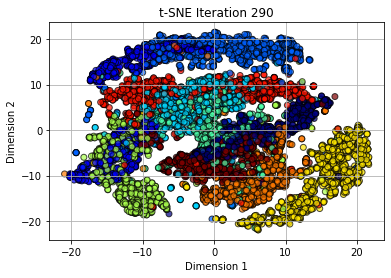


Iteration 300: error is 1.98880
Time taken:21.948392391204834 sec



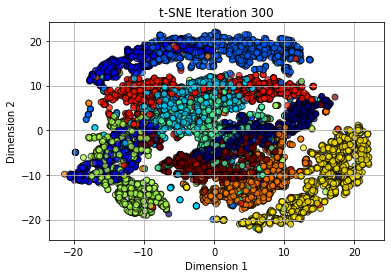


Iteration 310: error is 1.97560
Time taken:21.940722703933716 sec



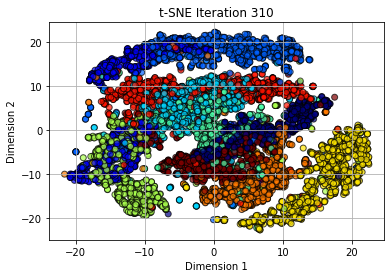


Iteration 320: error is 1.96302
Time taken:21.95370626449585 sec



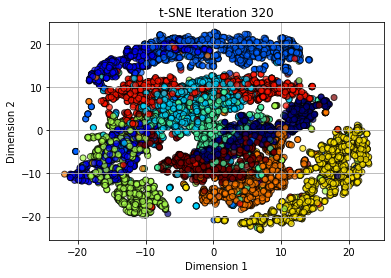


Iteration 330: error is 1.95090
Time taken:21.950956344604492 sec



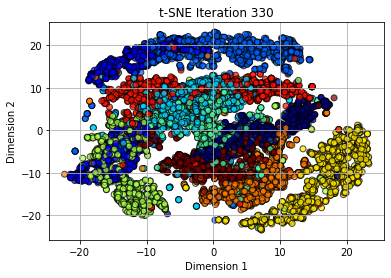


Iteration 340: error is 1.93930
Time taken:21.964321613311768 sec



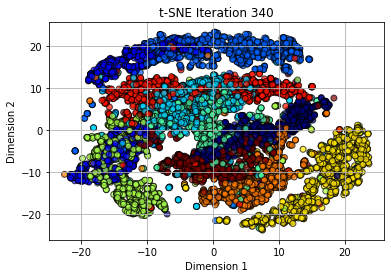


Iteration 350: error is 1.92818
Time taken:21.9882709980011 sec



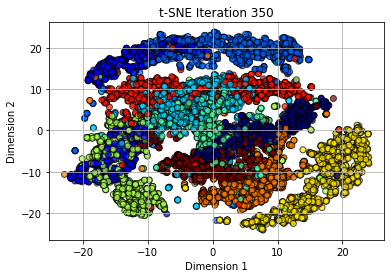


Iteration 360: error is 1.91750
Time taken:21.960795402526855 sec



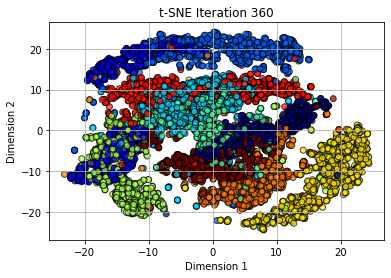


Iteration 370: error is 1.90720
Time taken:21.964687824249268 sec



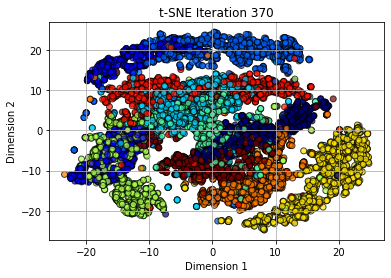


Iteration 380: error is 1.89726
Time taken:21.967024087905884 sec



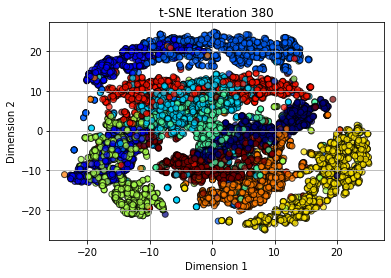


Iteration 390: error is 1.88768
Time taken:21.96955156326294 sec



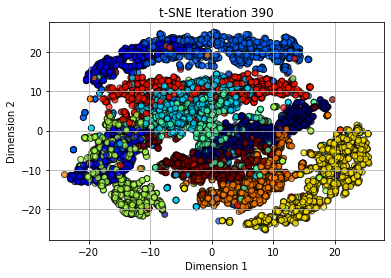

In [18]:
mnist_tsne = TSNE(n_components=3,perplexity=30)
mnist_3d = mnist_tsne.fit_transform(mnist_50d,mnist_sampled_labels)